In [2]:
import netCDF4
from mogreps import make_data_object_name, download_data

In [3]:
from itertools import product

realizations = [0, 1, 2, 3]

forecast_periods = [12, 15, 18]

key_names = [
    make_data_object_name('mogreps-g', 2016, 6, 1, 0, r, f) for r, f in product(realizations, forecast_periods)
]

In [4]:
paths = [download_data('mogreps-g', name) for name in key_names]

In [6]:
data_set = netCDF4.Dataset(paths[0])

# Convert time numbers to dates

In [7]:
data_set['time'].units

'hours since 1970-01-01 00:00:00'

In [9]:
help(netCDF4.num2date)

Help on built-in function num2date in module netCDF4._netCDF4:

num2date(...)
    **`num2date(times,units,calendar='standard')`**
    
    Return datetime objects given numeric time values. The units
    of the numeric time values are described by the `units` argument
    and the `calendar` keyword. The returned datetime objects represent
    UTC with no time-zone offset, even if the specified
    `units` contain a time-zone offset.
    
    **`times`**: numeric time values.
    
    **`units`**: a string of the form `<time units> since <reference time>`
    describing the time units. `<time units>` can be days, hours, minutes,
    seconds, milliseconds or microseconds. `<reference time>` is the time
    origin.
    
    **`calendar`**: describes the calendar used in the time calculations.
    All the values currently defined in the 
    [CF metadata convention](http://cfconventions.org)
    Valid calendars `'standard', 'gregorian', 'proleptic_gregorian'
    'noleap', '365_day', '360_d

## Let's put that into a function

In [10]:
def get_dates(data_set):
    """Obtain `datetime.datetime` objects from the `'time'` axis of a NetCDF `DataSet`."""
    return netCDF4.num2date(data_set['time'][:], data_set['time'].units)

In [11]:
get_dates(data_set)

datetime.datetime(2016, 6, 1, 12, 0)

In [18]:
data_set.variables.keys()

odict_keys(['wet_bulb_freezing_level_altitude', 'latitude_longitude', 'latitude', 'longitude', 'forecast_period', 'forecast_reference_time', 'time', 'wet_bulb_potential_temperature', 'pressure', 'air_pressure_at_sea_level', 'air_temperature', 'height', 'air_temperature_0', 'forecast_period_0', 'forecast_period_0_bnds', 'forecast_reference_time_0', 'time_0', 'time_0_bnds', 'air_temperature_1', 'air_temperature_2', 'pressure_0', 'dew_point_temperature', 'fog_area_fraction', 'geopotential_height', 'pressure_1', 'high_type_cloud_area_fraction', 'low_type_cloud_area_fraction', 'medium_type_cloud_area_fraction', 'relative_humidity', 'relative_humidity_0', 'stratiform_rainfall_amount', 'stratiform_snowfall_amount', 'surface_downward_eastward_stress', 'longitude_0', 'level_height', 'level_height_bnds', 'model_level_number', 'sigma', 'sigma_bnds', 'surface_downward_northward_stress', 'latitude_0', 'visibility_in_air', 'wind_speed_of_gust', 'height_0', 'wind_speed_of_gust_0', 'x_wind', 'x_wind_0

# Plotting with Cartopy

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

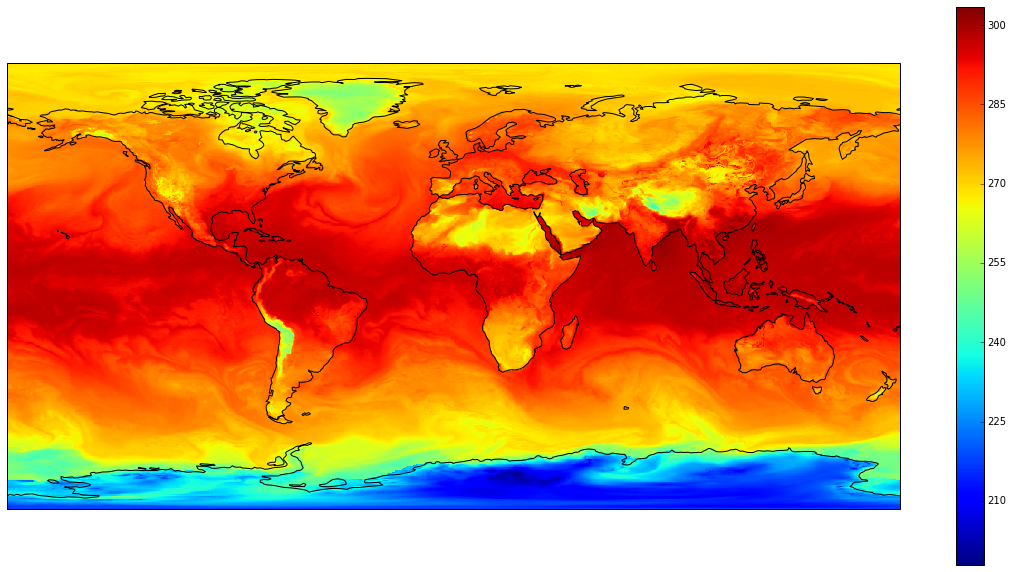

In [16]:
transform=ccrs.RotatedPole(pole_longitude=180.0, pole_latitude=90)
projection=ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(
    data_set['longitude'][:], data_set['latitude'][:], data_set['dew_point_temperature'],
    transform=transform)
ax.coastlines()
fig.colorbar(pcm)

## Save typing by writing a function!

In [24]:
def earth_plot(
        data_set, variable, *,
        transform=ccrs.RotatedPole(pole_longitude=180.0, pole_latitude=90),
        projection=ccrs.PlateCarree(), cblabel=None):
    """Create a plot from the `data_set`, using the given transform and projection."""
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection=projection)
    pcm = ax.pcolormesh(
        data_set['longitude'][:], data_set['latitude'][:], data_set[variable],
        transform=transform)
    ax.coastlines()
    ax.gridlines()
    fig.colorbar(pcm, label=cblabel or variable)
    return fig, ax

(<matplotlib.figure.Figure at 0x7f0188854ef0>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f018865d978>)

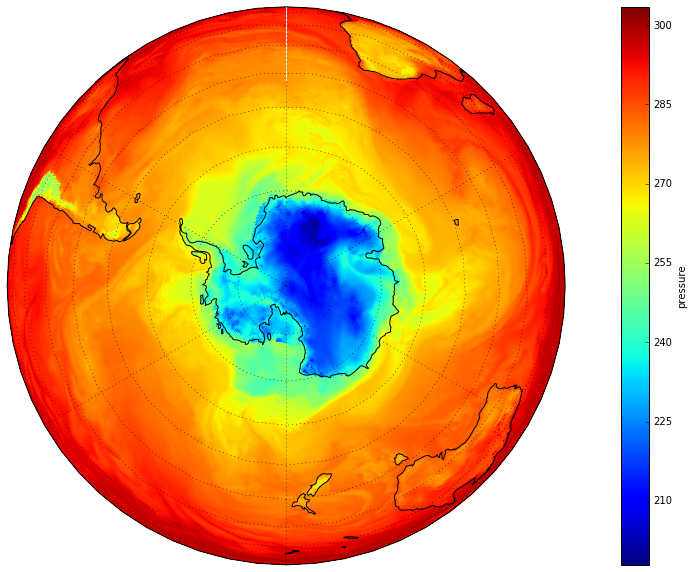

In [26]:
earth_plot(data_set, 'dew_point_temperature', projection=ccrs.Orthographic(central_latitude=-90), cblabel='pressure')